### Tarea 1
#### Métodos de Aprendizajes de Máquinas en Data Science

Integrantes: Sofía Álvarez, Sebastián Dinator.

## Limpieza de Datos

In [1]:
#Instalando las librerias requeridas
import sys
!{sys.executable} -m pip install numpy pandas plotnine #sklearn

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
#from plotnine import *

In [2]:
#Graficos
from plotnine import ggplot
from plotnine import *

In [3]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.24.3


In [22]:
df = pd.read_csv('dataTaxi.csv')
df

Unnamed: 0  LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM  Horas  \
0                1  -33.484436   -70.734913  -33.437822   -70.647421      1   
1                3  -33.523092   -70.782872  -33.437234   -70.647150      0   
2                4  -33.455709   -70.631109  -33.437341   -70.647136      0   
3                5  -33.294220   -70.883511  -33.437682   -70.647190      0   
4                6  -33.437601   -70.647152  -33.294479   -70.883178     10   
...            ...         ...          ...         ...          ...    ...   
452161      630819  -33.410845   -70.587625  -33.403157   -70.794847     23   
452162      630820  -33.378059   -70.659924  -33.410613   -70.794746     22   
452163      630821  -33.579867   -70.705105  -33.402888   -70.794640     23   
452164      630822  -33.396931   -70.792297  -33.433149   -70.624117     22   
452165      630823  -33.606829   -70.603256  -33.397253   -70.794207     22   

            DoW     Hora_Inicio        Hora_Fin  distKilometros  
0       sÃ¡bado  01-03-14 01:28  01-03-14 01:59        9.640889  
1       sÃ¡bado  01-03-14 00:04  01-03-14 00:44       15.816194  
2       sÃ¡bado  01-03-14 00:33  01-03-14 00:42        2.529204  
3       sÃ¡bado  01-03-14 00:20  01-03-14 00:56       27.161926  
4       sÃ¡bado  01-03-14 10:16  01-03-14 10:53       27.117458  
...         ...             ...             ...             ...  
452161  domingo  31-07-16 23:18  31-07-16 23:44       19.275570  
452162  domingo  31-07-16 22:43  31-07-16 23:06       13.044041  
452163  domingo  31-07-16 23:02  31-07-16 23:33       21.382867  
452164  domingo  31-07-16 22:31  31-07-16 23:02       16.138766  
452165  domingo  31-07-16 22:52  31-07-16 23:22       29.299502  

[452166 rows x 10 columns]

In [23]:

print(df.shape)
print(df.dtypes)
print(df.head(10))
display(df.describe())

(452166, 10)
Unnamed: 0          int64
LatitudPAB        float64
LongitudPAB       float64
LatitudCOM        float64
LongitudCOM       float64
Horas               int64
DoW                object
Hora_Inicio        object
Hora_Fin           object
distKilometros    float64
dtype: object
   Unnamed: 0  LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM  Horas  \
0           1  -33.484436   -70.734913  -33.437822   -70.647421      1   
1           3  -33.523092   -70.782872  -33.437234   -70.647150      0   
2           4  -33.455709   -70.631109  -33.437341   -70.647136      0   
3           5  -33.294220   -70.883511  -33.437682   -70.647190      0   
4           6  -33.437601   -70.647152  -33.294479   -70.883178     10   
5           7  -33.581636   -70.589615  -33.437660   -70.647082      0   
6           8  -33.454111   -70.680542  -33.437381   -70.646830      0   
7           9  -33.516536   -70.652969  -33.440460   -70.647180      0   
8          11  -33.541820   -70.620224  -33.437

Unnamed: 0     LatitudPAB    LongitudPAB     LatitudCOM  \
count  452166.000000  452166.000000  452166.000000  452166.000000   
mean   315556.037500     -33.436718     -70.655944     -33.442694   
std    181053.682589       0.055233       0.074918       0.060474   
min         1.000000     -33.868754     -70.979306     -33.869713   
25%    160921.250000     -33.453083     -70.699870     -33.458440   
50%    317026.000000     -33.433158     -70.646739     -33.436642   
75%    470740.750000     -33.403836     -70.601023     -33.405790   
max    630823.000000     -33.150050     -70.403065     -33.150720   

         LongitudCOM          Horas  distKilometros  
count  452166.000000  452166.000000   452166.000000  
mean      -70.660850      11.793052       10.598621  
std         0.077424       6.895245        7.393171  
min       -70.979998       0.000000        0.030007  
25%       -70.712886       7.000000        4.548679  
50%       -70.650034      12.000000        9.529020  
75%       -70.601565      18.000000       16.008261  
max       -70.407848      23.000000       65.847860

In [24]:
nulos = df.isnull().sum()
print(nulos)

Unnamed: 0        0
LatitudPAB        0
LongitudPAB       0
LatitudCOM        0
LongitudCOM       0
Horas             0
DoW               0
Hora_Inicio       0
Hora_Fin          0
distKilometros    0
dtype: int64


In [21]:
df['LaPAB'] = df['LatitudPAB']*(-1)
df['LoPAB'] = df['LongitudPAB']*(-1)
df['LaCOM'] = df['LatitudCOM']*(-1)
df['LoCOM'] = df['LongitudCOM']*(-1)

display(df.head(5))

Unnamed: 0  LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM  Horas  \
0           1  -33.484436   -70.734913  -33.437822   -70.647421      1   
1           3  -33.523092   -70.782872  -33.437234   -70.647150      0   
2           4  -33.455709   -70.631109  -33.437341   -70.647136      0   
3           5  -33.294220   -70.883511  -33.437682   -70.647190      0   
4           6  -33.437601   -70.647152  -33.294479   -70.883178     10   

       DoW     Hora_Inicio        Hora_Fin  distKilometros      LaPAB  \
0  sÃ¡bado  01-03-14 01:28  01-03-14 01:59        9.640889  33.484436   
1  sÃ¡bado  01-03-14 00:04  01-03-14 00:44       15.816194  33.523092   
2  sÃ¡bado  01-03-14 00:33  01-03-14 00:42        2.529204  33.455709   
3  sÃ¡bado  01-03-14 00:20  01-03-14 00:56       27.161926  33.294220   
4  sÃ¡bado  01-03-14 10:16  01-03-14 10:53       27.117458  33.437601   

       LoPAB      LaCOM      LoCOM  
0  70.734913  33.437822  70.647421  
1  70.782872  33.437234  70.647150  
2  70.631109  33.437341  70.647136  
3  70.883511  33.437682  70.647190  
4  70.647152  33.294479  70.883178

In [ ]:
# Eliminando la columna Unnamed: 0
# df = df.drop(columns=['Unnamed: 0'])

# Eliminando los registros con valores blancos
#df['DoW'] = df['DoW'].str.strip()

In [25]:

display(df['DoW'].unique())


array(['sÃ¡bado', 'domingo', 'lunes', 'martes', 'miÃ©rcoles', 'jueves',
       'viernes'], dtype=object)

In [9]:
df['DoW'] = df['DoW'].str.replace('sÃ¡bado', 'sabado')
df['DoW'] = df['DoW'].str.replace('miÃ©rcoles', 'miercoles')
df

Unnamed: 0  LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM  Horas  \
0                1  -33.484436   -70.734913  -33.437822   -70.647421      1   
1                3  -33.523092   -70.782872  -33.437234   -70.647150      0   
2                4  -33.455709   -70.631109  -33.437341   -70.647136      0   
3                5  -33.294220   -70.883511  -33.437682   -70.647190      0   
4                6  -33.437601   -70.647152  -33.294479   -70.883178     10   
...            ...         ...          ...         ...          ...    ...   
452161      630819  -33.410845   -70.587625  -33.403157   -70.794847     23   
452162      630820  -33.378059   -70.659924  -33.410613   -70.794746     22   
452163      630821  -33.579867   -70.705105  -33.402888   -70.794640     23   
452164      630822  -33.396931   -70.792297  -33.433149   -70.624117     22   
452165      630823  -33.606829   -70.603256  -33.397253   -70.794207     22   

            DoW     Hora_Inicio        Hora_Fin  distKilometros      LaPAB  \
0        sabado  01-03-14 01:28  01-03-14 01:59        9.640889  33.484436   
1        sabado  01-03-14 00:04  01-03-14 00:44       15.816194  33.523092   
2        sabado  01-03-14 00:33  01-03-14 00:42        2.529204  33.455709   
3        sabado  01-03-14 00:20  01-03-14 00:56       27.161926  33.294220   
4        sabado  01-03-14 10:16  01-03-14 10:53       27.117458  33.437601   
...         ...             ...             ...             ...        ...   
452161  domingo  31-07-16 23:18  31-07-16 23:44       19.275570  33.410845   
452162  domingo  31-07-16 22:43  31-07-16 23:06       13.044041  33.378059   
452163  domingo  31-07-16 23:02  31-07-16 23:33       21.382867  33.579867   
452164  domingo  31-07-16 22:31  31-07-16 23:02       16.138766  33.396931   
452165  domingo  31-07-16 22:52  31-07-16 23:22       29.299502  33.606829   

            LoPAB      LaCOM      LoCOM  
0       70.734913  33.437822  70.647421  
1       70.782872  33.437234  70.647150  
2       70.631109  33.437341  70.647136  
3       70.883511  33.437682  70.647190  
4       70.647152  33.294479  70.883178  
...           ...        ...        ...  
452161  70.587625  33.403157  70.794847  
452162  70.659924  33.410613  70.794746  
452163  70.705105  33.402888  70.794640  
452164  70.792297  33.433149  70.624117  
452165  70.603256  33.397253  70.794207  

[452166 rows x 14 columns]

In [26]:
# Convirtiendo las columnas de Hora_Inicio y Hora_Fin a formato datetime

df.rename(columns={'Horas': 'Inicio'}, inplace=True)


df['Hora_Fin'] = pd.to_datetime(df['Hora_Fin'], format='%d-%m-%y %H:%M')
df['Fin'] = df['Hora_Fin'].dt.hour

In [27]:

display(df.head(3))

Unnamed: 0  LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM  Inicio  \
0           1  -33.484436   -70.734913  -33.437822   -70.647421       1   
1           3  -33.523092   -70.782872  -33.437234   -70.647150       0   
2           4  -33.455709   -70.631109  -33.437341   -70.647136       0   

       DoW     Hora_Inicio            Hora_Fin  distKilometros  Fin  
0  sÃ¡bado  01-03-14 01:28 2014-03-01 01:59:00        9.640889    1  
1  sÃ¡bado  01-03-14 00:04 2014-03-01 00:44:00       15.816194    0  
2  sÃ¡bado  01-03-14 00:33 2014-03-01 00:42:00        2.529204    0

In [28]:

#data_encoded = pd.get_dummies(data, columns=['DoW'])
#data_encoded

scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros']])
data = pd.DataFrame(data_estandarizada, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros'])
display(data.head(5))

LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM    Inicio       Fin  \
0   -0.863928    -1.054064    0.080578     0.173438 -1.565291 -1.551831   
1   -1.563796    -1.694225    0.090296     0.176944 -1.710319 -1.694343   
2   -0.343831     0.331501    0.088519     0.177128 -1.710319 -1.694343   
3    2.579938    -3.037538    0.082890     0.176426 -1.710319 -1.694343   
4   -0.015977     0.117358    2.450896    -2.871585 -0.260042 -0.269221   

   distKilometros  
0       -0.129543  
1        0.705729  
2       -1.091470  
3        2.240354  
4        2.234340

In [13]:

#data_encoded = pd.get_dummies(data, columns=['DoW'])
#data_encoded

scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(df[['LaPAB', 'LoPAB',	'LaCOM','LoCOM', 'Inicio', 'Fin', 'distKilometros']])
data = pd.DataFrame(data_estandarizada, columns = ['LaPAB', 'LoPAB',	'LaCOM',	'LoCOM', 'Inicio', 'Fin', 'distKilometros'])
display(data.head(5))

LaPAB     LoPAB     LaCOM     LoCOM    Inicio       Fin  distKilometros
0  0.863928  1.054064 -0.080578 -0.173438 -1.565291 -1.551831       -0.129543
1  1.563796  1.694225 -0.090296 -0.176944 -1.710319 -1.694343        0.705729
2  0.343831 -0.331501 -0.088519 -0.177128 -1.710319 -1.694343       -1.091470
3 -2.579938  3.037538 -0.082890 -0.176426 -1.710319 -1.694343        2.240354
4  0.015977 -0.117358 -2.450896  2.871585 -0.260042 -0.269221        2.234340

In [14]:
data.describe()

LaPAB         LoPAB         LaCOM         LoCOM        Inicio  \
count  4.521660e+05  4.521660e+05  4.521660e+05  4.521660e+05  4.521660e+05   
mean   1.126691e-13 -3.951908e-14 -3.097583e-15  3.522898e-14 -1.272222e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -5.190129e+00 -3.375414e+00 -4.828107e+00 -3.267763e+00 -1.710319e+00   
25%   -5.953334e-01 -7.330849e-01 -6.102573e-01 -7.657219e-01 -6.951250e-01   
50%   -6.446156e-02 -1.228695e-01 -1.000881e-01 -1.396981e-01  3.001323e-02   
75%    2.962894e-01  5.863143e-01  2.603743e-01  6.720962e-01  9.001791e-01   
max    7.821995e+00  4.316206e+00  7.061206e+00  4.122103e+00  1.625317e+00   

                Fin  distKilometros  
count  4.521660e+05    4.521660e+05  
mean  -6.725678e-17    1.156565e-16  
std    1.000001e+00    1.000001e+00  
min   -1.694343e+00   -1.429512e+00  
25%   -8.392697e-01   -8.183158e-01  
50%    1.580359e-02   -1.446744e-01  
75%    8.708769e-01    7.317085e-01  
max    1.583438e+00    7.473018e+00

In [15]:
data['Coordenada'] = data.apply(lambda row: [row['LaPAB'], row['LoPAB'], row['LaCOM'], row['LoCOM']], axis=1)

display(data.head(5))

LaPAB     LoPAB     LaCOM     LoCOM    Inicio       Fin  distKilometros  \
0  0.863928  1.054064 -0.080578 -0.173438 -1.565291 -1.551831       -0.129543   
1  1.563796  1.694225 -0.090296 -0.176944 -1.710319 -1.694343        0.705729   
2  0.343831 -0.331501 -0.088519 -0.177128 -1.710319 -1.694343       -1.091470   
3 -2.579938  3.037538 -0.082890 -0.176426 -1.710319 -1.694343        2.240354   
4  0.015977 -0.117358 -2.450896  2.871585 -0.260042 -0.269221        2.234340   

                                          Coordenada  
0  [0.8639279941226188, 1.0540643068056132, -0.08...  
1  [1.5637963448262027, 1.694225405709247, -0.090...  
2  [0.3438313431371832, -0.3315009330706835, -0.0...  
3  [-2.579938255829802, 3.037537791963414, -0.082...  
4  [0.01597710981515981, -0.11735751773923452, -2...

In [29]:
data['DoW'] = df['DoW']
data.head(3)

LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM    Inicio       Fin  \
0   -0.863928    -1.054064    0.080578     0.173438 -1.565291 -1.551831   
1   -1.563796    -1.694225    0.090296     0.176944 -1.710319 -1.694343   
2   -0.343831     0.331501    0.088519     0.177128 -1.710319 -1.694343   

   distKilometros      DoW  
0       -0.129543  sÃ¡bado  
1        0.705729  sÃ¡bado  
2       -1.091470  sÃ¡bado

In [30]:
data_final = data[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros', 'DoW']]
data_encoded = pd.get_dummies(data_final, columns=['DoW'])
data_encoded

LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM    Inicio       Fin  \
0        -0.863928    -1.054064    0.080578     0.173438 -1.565291 -1.551831   
1        -1.563796    -1.694225    0.090296     0.176944 -1.710319 -1.694343   
2        -0.343831     0.331501    0.088519     0.177128 -1.710319 -1.694343   
3         2.579938    -3.037538    0.082890     0.176426 -1.710319 -1.694343   
4        -0.015977     0.117358    2.450896    -2.871585 -0.260042 -0.269221   
...            ...          ...         ...          ...       ...       ...   
452161    0.468436     0.911923    0.653799    -1.730698  1.625317  1.583438   
452162    1.062036    -0.053113    0.530506    -1.729400  1.480290  1.583438   
452163   -2.591700    -0.656191    0.658238    -1.728029  1.625317  1.583438   
452164    0.720342    -1.820019    0.157853     0.474442  1.480290  1.583438   
452165   -3.079854     0.703281    0.751417    -1.722433  1.480290  1.583438   

        distKilometros  DoW_domingo  DoW_jueves  DoW_lunes  DoW_martes  \
0            -0.129543            0           0          0           0   
1             0.705729            0           0          0           0   
2            -1.091470            0           0          0           0   
3             2.240354            0           0          0           0   
4             2.234340            0           0          0           0   
...                ...          ...         ...        ...         ...   
452161        1.173645            1           0          0           0   
452162        0.330768            1           0          0           0   
452163        1.458678            1           0          0           0   
452164        0.749361            1           0          0           0   
452165        2.529483            1           0          0           0   

        DoW_miÃ©rcoles  DoW_sÃ¡bado  DoW_viernes  
0                    0            1            0  
1                    0            1            0  
2                    0            1            0  
3                    0            1            0  
4                    0            1            0  
...                ...          ...          ...  
452161               0            0            0  
452162               0            0            0  
452163               0            0            0  
452164               0            0            0  
452165               0            0            0  

[452166 rows x 14 columns]

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame df con tus datos
# Las columnas son: 'Inicio', 'Fin', 'distKilometros', 'DoW_domingo', 'DoW_jueves', 'DoW_lunes', 'DoW_martes', 'DoW_miercoles', 'DoW_sabado', 'DoW_viernes'

# Combina las coordenadas de inicio y fin en un solo vector
df['Coordenadas'] = df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM']].values.tolist()

# Selecciona solo la columna de coordenadas
data = df['Coordenadas']

# Estandariza las características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplica K-means
kmeans = KMeans(n_clusters=K)
kmeans.fit(scaled_data)

# Etiquetas de cluster para cada punto de datos
cluster_labels = kmeans.labels_

# Agrega las etiquetas de cluster al DataFrame original
df['Cluster'] = cluster_labels

ValueError: setting an array element with a sequence.

## K-Means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[3543950.7670103265, 2855432.259822856, 2542729.094861187, 2293577.222169149, 2108941.827658571, 1954477.8828906983, 1854626.2457465127, 1768616.0595269399, 1696535.1451326692, 1638813.1019651433, 1584366.4873925457, 1541867.44915309, 1501862.041879994, 1467304.999729237, 1433562.451930443, 1405151.1491951942, 1379788.7709325093, 1355601.4003157844, 1331883.5494992048]


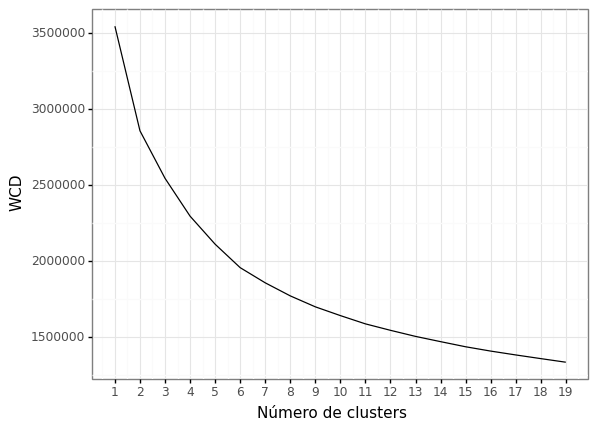

<ggplot: (8760377304426)>

In [22]:
from sklearn.cluster import KMeans
sse = []
numK = 20
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=70)
    kmeans.fit(data_encoded)
    print(k)
    sse.append(kmeans.inertia_)

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

In [72]:
km = KMeans(n_clusters=6)  
print(km)

KMeans(n_clusters=6)


In [73]:
km=km.fit(data_encoded)
print(km)

KMeans(n_clusters=6)


In [74]:
from sympy import Matrix
print('Centroides por variable:')
Matrix(km.cluster_centers_) #Mostrando los centros de los clusters

Centroides por variable:


Matrix([
[ 0.146853972828931,  0.589905314848593,  0.675557540295399,   -1.49761815683314,  0.298509768147775,  0.290672151116911,  0.909541548120169, 0.0760980833740136, 0.157582247980219,   0.21101784336269, 0.189127045372219,  0.17000803187552, 0.0542230341591008,  0.14194371387624],
[ -2.09178031113906, -0.205320120411624, -0.313612640113134, -0.0755534661179346, -0.242753288700932, -0.195150737068952,  0.362072666143883, 0.0697679607318134,   0.1723114680946,  0.182463186077642,   0.1739625167336, 0.169946452476574, 0.0798081213743866, 0.151740294511382],
[ 0.885176122536947,  -1.47643039048663,  0.283676050495992,   0.164949058577707,  0.827492196484527,  0.717495480804694,   0.55725438761554, 0.0643345176277652, 0.198050469162796,  0.152026965473263, 0.167113054568641, 0.177881023959189, 0.0558622574473953, 0.184731711760958],
[ 0.112137273565237,  0.496521116628228,  0.165410850992287,   0.519149975643334,   0.58778605456242,  0.599451752878559, -0.758018941062267, 0.0197184492

In [75]:
#GRAFICANDO LOS CLUSTERS
#Creando data frame con los datos y etiquetas

tempDF=pd.DataFrame(data_encoded,columns=data_encoded.columns)

tempDF['labels']=km.labels_
print('DATOS ORIGINALES:')
display(tempDF)
#Sgy esto de arriba no es necesario. 


DATOS ORIGINALES:


LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM    Inicio       Fin  \
0        -0.863928    -1.054064    0.080578     0.173438 -1.565291 -1.551831   
1        -1.563796    -1.694225    0.090296     0.176944 -1.710319 -1.694343   
2        -0.343831     0.331501    0.088519     0.177128 -1.710319 -1.694343   
3         2.579938    -3.037538    0.082890     0.176426 -1.710319 -1.694343   
4        -0.015977     0.117358    2.450896    -2.871585 -0.260042 -0.269221   
...            ...          ...         ...          ...       ...       ...   
452161    0.468436     0.911923    0.653799    -1.730698  1.625317  1.583438   
452162    1.062036    -0.053113    0.530506    -1.729400  1.480290  1.583438   
452163   -2.591700    -0.656191    0.658238    -1.728029  1.625317  1.583438   
452164    0.720342    -1.820019    0.157853     0.474442  1.480290  1.583438   
452165   -3.079854     0.703281    0.751417    -1.722433  1.480290  1.583438   

        distKilometros  DoW_domingo  DoW_jueves  DoW_lunes  DoW_martes  \
0            -0.129543            0           0          0           0   
1             0.705729            0           0          0           0   
2            -1.091470            0           0          0           0   
3             2.240354            0           0          0           0   
4             2.234340            0           0          0           0   
...                ...          ...         ...        ...         ...   
452161        1.173645            1           0          0           0   
452162        0.330768            1           0          0           0   
452163        1.458678            1           0          0           0   
452164        0.749361            1           0          0           0   
452165        2.529483            1           0          0           0   

        DoW_miercoles  DoW_sabado  DoW_viernes  labels  
0                   0           1            0       5  
1                   0           1            0       5  
2                   0           1            0       5  
3                   0           1            0       5  
4                   0           1            0       0  
...               ...         ...          ...     ...  
452161              0           0            0       0  
452162              0           0            0       0  
452163              0           0            0       1  
452164              0           0            0       2  
452165              0           0            0       0  

[452166 rows x 15 columns]

In [44]:
data_encoded.columns[0:14]

Index(['LaPAB', 'LoPAB', 'LaCOM', 'LoCOM', 'Inicio', 'Fin', 'distKilometros',
       'DoW_domingo', 'DoW_jueves', 'DoW_lunes', 'DoW_martes', 'DoW_miercoles',
       'DoW_sabado', 'DoW_viernes'],
      dtype='object')

In [35]:
km.cluster_centers_.shape

(6, 14)

DATOS ORIGINALES:


CENTROIDES

Centroides por variable:


Matrix([
[ 0.146853972828931,  0.589905314848593,  0.675557540295399,   -1.49761815683314,  0.298509768147775,  0.290672151116911,  0.909541548120169, 0.0760980833740136, 0.157582247980219,   0.21101784336269, 0.189127045372219,  0.17000803187552, 0.0542230341591008,  0.14194371387624],
[ -2.09178031113906, -0.205320120411624, -0.313612640113134, -0.0755534661179346, -0.242753288700932, -0.195150737068952,  0.362072666143883, 0.0697679607318134,   0.1723114680946,  0.182463186077642,   0.1739625167336, 0.169946452476574, 0.0798081213743866, 0.151740294511382],
[ 0.885176122536947,  -1.47643039048663,  0.283676050495992,   0.164949058577707,  0.827492196484527,  0.717495480804694,   0.55725438761554, 0.0643345176277652, 0.198050469162796,  0.152026965473263, 0.167113054568641, 0.177881023959189, 0.0558622574473953, 0.184731711760958],
[ 0.112137273565237,  0.496521116628228,  0.165410850992287,   0.519149975643334,   0.58778605456242,  0.599451752878559, -0.758018941062267, 0.0197184492

/Users/sofi/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#db5f57ff', '#d3db57ff', '#57db5fff', '#57d3dbff', '#5f57dbff', '#db57d3ff']) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


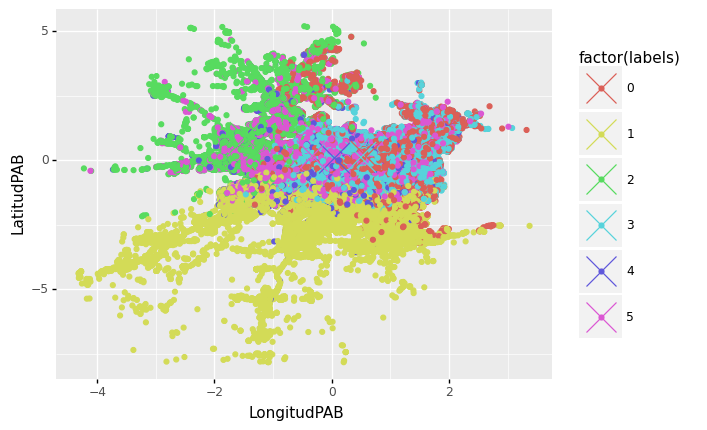

/Users/sofi/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#db5f57ff', '#d3db57ff', '#57db5fff', '#57d3dbff', '#5f57dbff', '#db57d3ff']) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


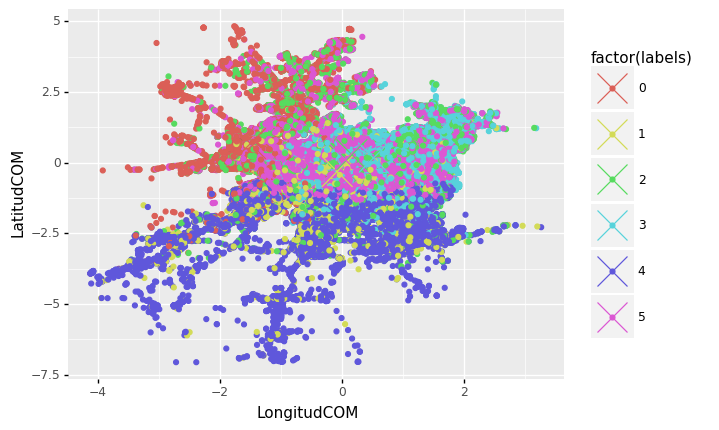

In [91]:
#Creando data frame con los datos y etiquetas

tempDF=pd.DataFrame(data_encoded,columns=data_encoded.columns)

tempDF['labels']=km.labels_
print('DATOS ORIGINALES:')

#Creando data frame con los centros y etiquetas
tempDF2=pd.DataFrame(km.cluster_centers_,columns=data_encoded.columns[0:14])
tempDF2['labels']=range(km.n_clusters)


print("\n\nCENTROIDES\n")
from sympy import Matrix
print('Centroides por variable:')
display(Matrix(km.cluster_centers_)) #Mostrando los centros de los clusters

#creando el gráfico
#(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point()
print(ggplot(tempDF)+aes(x="LongitudPAB", y="LatitudPAB",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12))
print(ggplot(tempDF)+aes(x="LongitudCOM", y="LatitudCOM",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12))

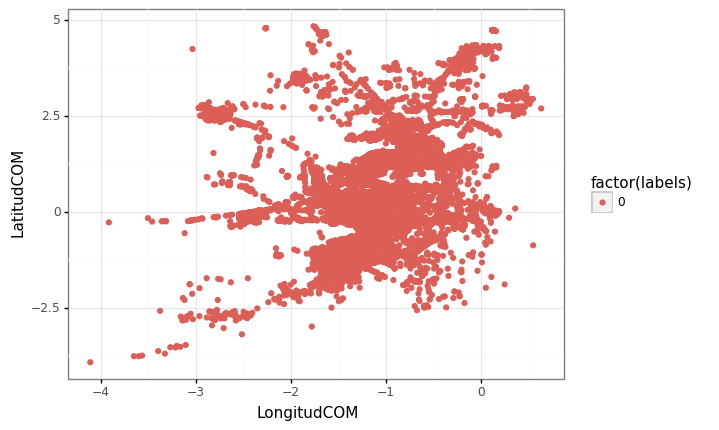

<ggplot: (8760230426844)>

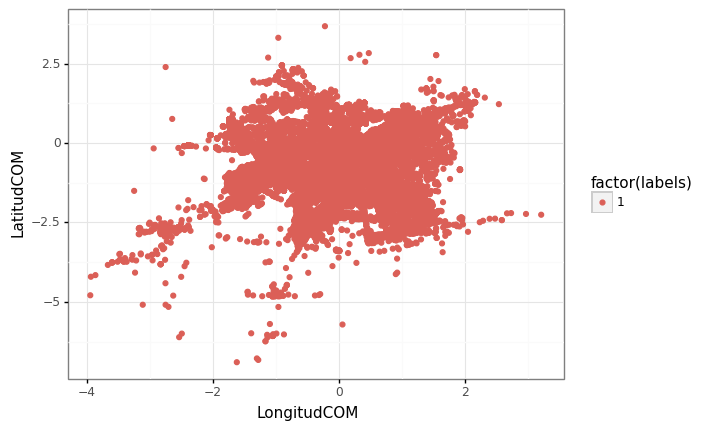

<ggplot: (8760241327129)>

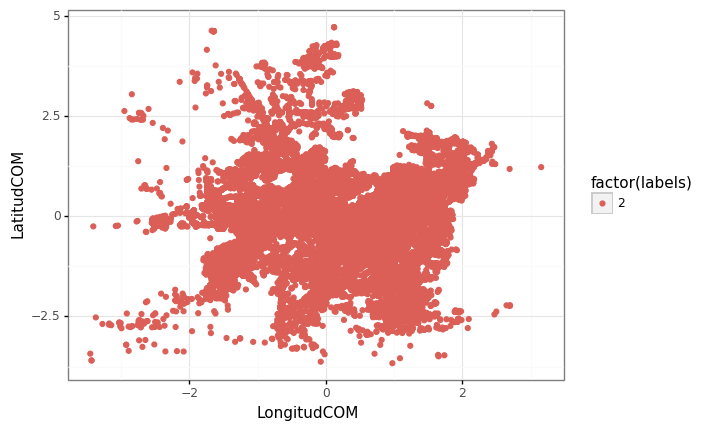

<ggplot: (8760239068495)>

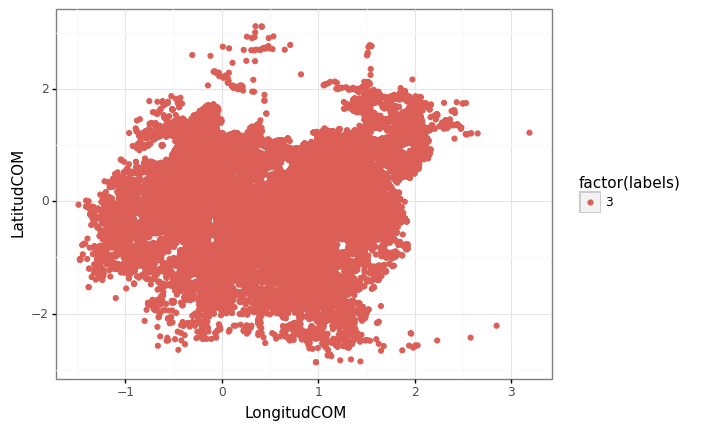

<ggplot: (8760254879510)>

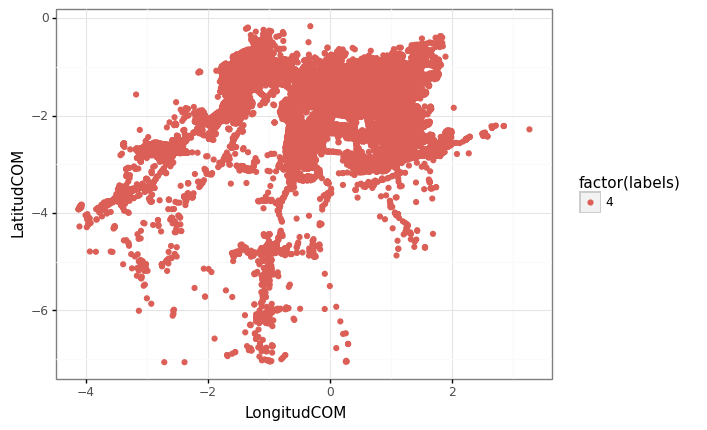

<ggplot: (8760239068663)>

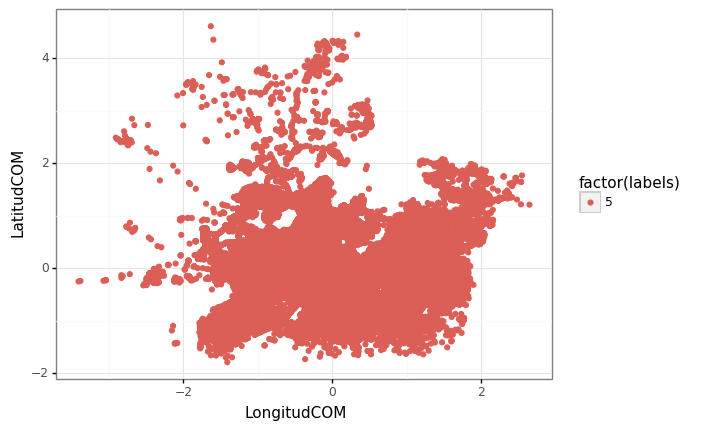

<ggplot: (8760258329064)>

In [88]:
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    display(ggplot(cluster)+aes(x="LongitudCOM",y="LatitudCOM",color="factor(labels)")+geom_point(show_legend=True)+theme_bw())

In [112]:
cluster = data_encoded[data_encoded['labels'] == i]
cluster[0:3][1:3]

LatitudPAB  LongitudPAB  LatitudCOM  LongitudCOM    Inicio       Fin  \
1   -1.563796    -1.694225    0.090296     0.176944 -1.710319 -1.694343   
2   -0.343831     0.331501    0.088519     0.177128 -1.710319 -1.694343   

   distKilometros  DoW_domingo  DoW_jueves  DoW_lunes  DoW_martes  \
1        0.705729            0           0          0           0   
2       -1.091470            0           0          0           0   

   DoW_miercoles  DoW_sabado  DoW_viernes  labels  
1              0           1            0       5  
2              0           1            0       5

In [ ]:
WCD = []
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    centroide = km.cluster_centers_[i]
    for j in cluster

In [95]:
km.cluster_centers_[1]

array([-2.09178031, -0.20532012, -0.31361264, -0.07555347, -0.24275329,
       -0.19515074,  0.36207267,  0.06976796,  0.17231147,  0.18246319,
        0.17396252,  0.16994645,  0.07980812,  0.15174029])

In [94]:
km.cluster_centers_

array([[ 0.14685397,  0.58990531,  0.67555754, -1.49761816,  0.29850977,
         0.29067215,  0.90954155,  0.07609808,  0.15758225,  0.21101784,
         0.18912705,  0.17000803,  0.05422303,  0.14194371],
       [-2.09178031, -0.20532012, -0.31361264, -0.07555347, -0.24275329,
        -0.19515074,  0.36207267,  0.06976796,  0.17231147,  0.18246319,
         0.17396252,  0.16994645,  0.07980812,  0.15174029],
       [ 0.88517612, -1.47643039,  0.28367605,  0.16494906,  0.8274922 ,
         0.71749548,  0.55725439,  0.06433452,  0.19805047,  0.15202697,
         0.16711305,  0.17788102,  0.05586226,  0.18473171],
       [ 0.11213727,  0.49652112,  0.16541085,  0.51914998,  0.58778605,
         0.59945175, -0.75801894,  0.01971845,  0.20442737,  0.16975927,
         0.20534278,  0.20296766,  0.02884782,  0.16893664],
       [ 0.08214127,  0.04813944, -2.06510558,  0.01109658, -1.00255364,
        -1.05626971,  1.00932359,  0.06616646,  0.18778426,  0.06074466,
         0.16619986,  0.17

In [89]:
# Cohesión

print(km.inertia_) #Within cluster distance

1954478.456999253


In [90]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_encoded, kmeans.labels_))

KeyboardInterrupt: 

## Problema 3) Explique los clusters encontrados en el problema 2) para una persona que no entiende lo que es un proceso de clusterización.

## Problema 4) Modifique k-means para que una vez que sea aplicado con un valor dado de k, analice cada cluster y, según alguna regla definida por usted, determine que clusters están mal definidos/incorrectos. Posteriormente, cada cluster incorrecto sepárelo en dos clusters y vuelva a correr k-means con el nuevo número de clusters y centroides. Repita este proceso hasta que todos los clusters encontrados sean considerados correctos.
